In [ ]:
import pandas as pd

def detailed_missing_report(file_path, output_file='missing_report.csv'):
    try:
        df = pd.read_csv(file_path)
        rows = len(df)

        # Количество пропусков до замены
        missing_data_before = df.isnull().sum()
        percent_missing_before = (missing_data_before / rows) * 100
        missing_df_before = pd.DataFrame({'Пропущенные значения (до)': missing_data_before,
                                             'Процент пропущенных значений (до)': percent_missing_before})

        print(f"Количество строк: {rows}")
        print("\nОтчет о пропущенных значениях (до замены):")
        print(missing_df_before)

        # Замена пропущенных значений модой
        for col in df.columns:
            if df[col].isnull().any(): # Проверяем, есть ли пропуски в столбце
                try:
                    mode = df[col].mode()[0]  # Вычисляем моду
                    df[col] = df[col].fillna(mode)  # Заполняем пропуски
                except TypeError:
                     print(f"Предупреждение: Не удалось заполнить пропуски модой для столбца '{col}'. Возможно, неподходящий тип данных.")
                     # Можно добавить альтернативную стратегию заполнения (например, средним или медианой)

        # Количество пропусков после замены
        missing_data_after = df.isnull().sum()
        percent_missing_after = (missing_data_after / rows) * 100
        missing_df_after = pd.DataFrame({'Пропущенные значения (после)': missing_data_after,
                                           'Процент пропущенных значений (после)': percent_missing_after})

        print("\nОтчет о пропущенных значениях (после замены модой):")
        print(missing_df_after)

        # Сохраняем DataFrame в новый CSV файл
        df.to_csv(output_file, index=False)  # Добавляем index=False, чтобы не сохранять индекс в файл
        print(f"\nОбработанный файл сохранен в файл: {output_file}")

    except FileNotFoundError:
        print(f"Ошибка: Файл не найден по пути: {file_path}")
    except pd.errors.EmptyDataError:
        print(f"Ошибка: CSV-файл пуст: {file_path}")
    except pd.errors.ParserError:
        print(f"Ошибка: Не удалось разобрать CSV-файл: {file_path}")
    except Exception as e:  # Обработка других возможных ошибок
        print(f"Произошла ошибка: {e}")
    except ValueError as ve:
        print(f"Ошибка ValueError: {ve}")

# Пример использования:
file_path = r'C:\\Users\\Karina\\Desktop\\Интенсив_3\\Макропоказатели.csv'  
output_file = 'C:\\Users\\Karina\\Desktop\\Интенсив_3\\МакропоказателиЧистка.csv' 
detailed_missing_report(file_path, output_file)

Количество строк: 1672

Отчет о пропущенных значениях (до замены):
                                                    Пропущенные значения (до)  \
dt                                                                          0   
Базовый индекс потребительских цен на товары и ...                       1643   
Ключевая ставка                                                           307   
Курс доллара                                                              334   

                                                    Процент пропущенных значений (до)  
dt                                                                           0.000000  
Базовый индекс потребительских цен на товары и ...                          98.265550  
Ключевая ставка                                                             18.361244  
Курс доллара                                                                19.976077  

Отчет о пропущенных значениях (после замены модой):
                                  

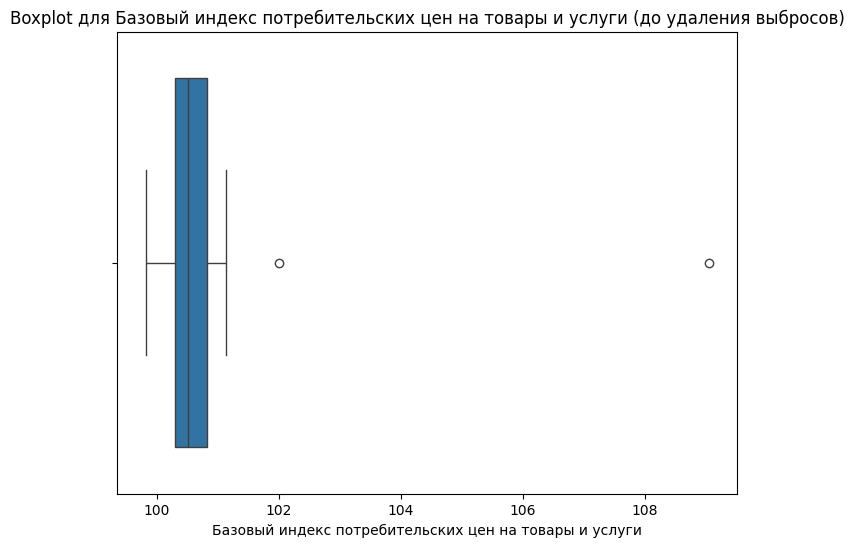

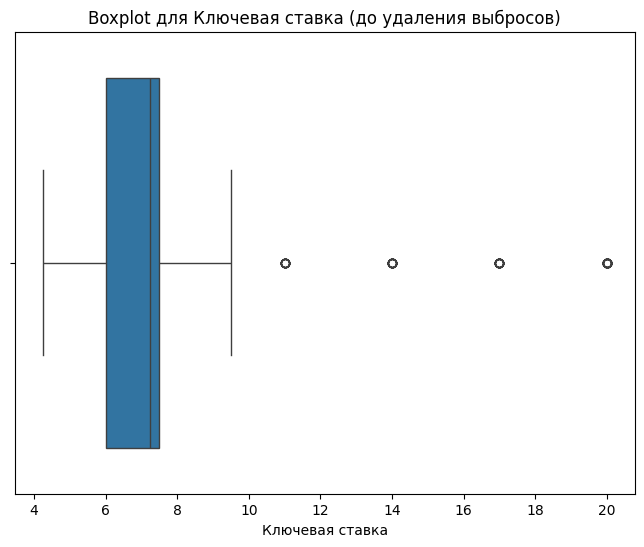

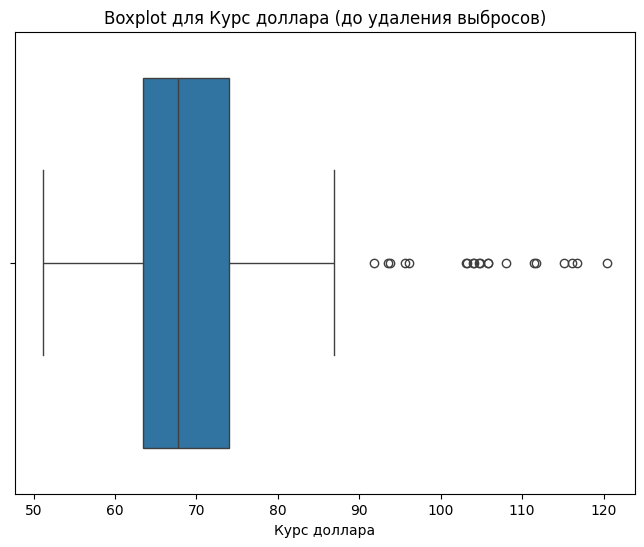

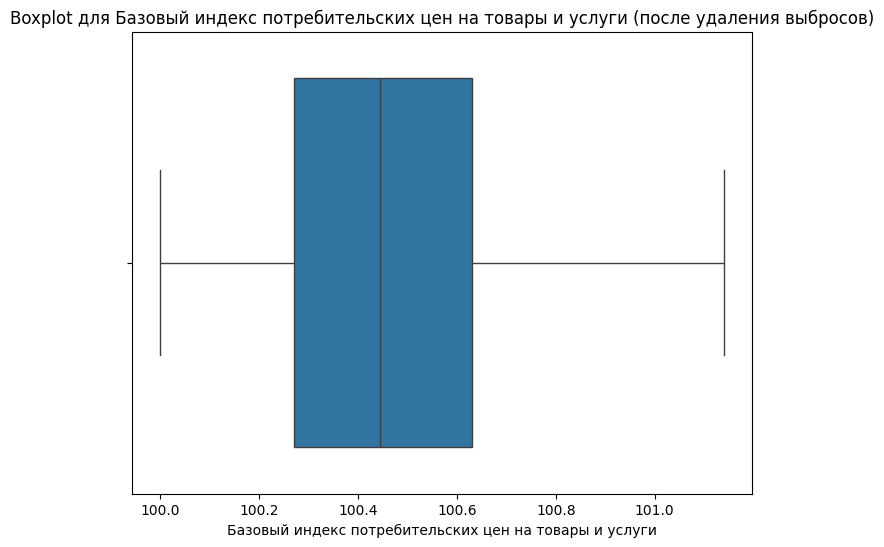

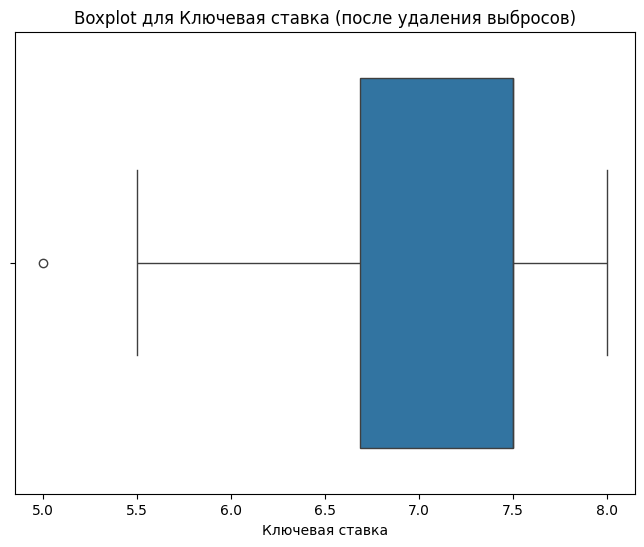

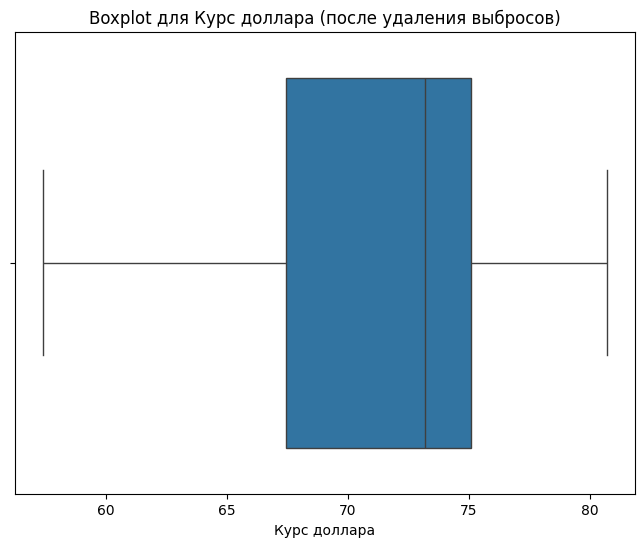

Очищенные данные сохранены в файл: C:\\Users\\Karina\\Desktop\\Интенсив_3\\МакропоказателиЧистка_1.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detect_and_remove_outliers(file_path, output_file='cleaned_data.csv', threshold=1.5):
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Ошибка: Файл не найден по пути: {file_path}")
        return None
    except pd.errors.EmptyDataError:
        print(f"Ошибка: CSV-файл пуст: {file_path}")
        return None
    except pd.errors.ParserError:
        print(f"Ошибка: Не удалось разобрать CSV-файл: {file_path}")
        return None

    numeric_cols = df.select_dtypes(include=np.number).columns

    if not numeric_cols.any():
        print("В файле нет числовых столбцов. Выбросы не могут быть обнаружены.")
        return None

    # 1. Отображение выбросов ДО удаления
    for col in numeric_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot для {col} (до удаления выбросов)')
        plt.xlabel(col)
        plt.show()

    # 2. Удаление выбросов
    df_cleaned = df.copy()
    for col in numeric_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]


    # 3. Отображение выбросов после удаления
    for col in numeric_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df_cleaned[col])
        plt.title(f'Boxplot для {col} (после удаления выбросов)')
        plt.xlabel(col)
        plt.show()

    # 4. Сохранение очищенных данных
    df_cleaned.to_csv(output_file, index=False)
    print(f"Очищенные данные сохранены в файл: {output_file}")



# Пример использования:  ОБЯЗАТЕЛЬНО ИЗМЕНИТЕ output_file!!!
file_path = r'C:\\Users\\Karina\\Desktop\\Интенсив_3\\Макропоказатели.csv'
output_file = r'C:\\Users\\Karina\\Desktop\\Интенсив_3\\МакропоказателиЧистка_1.csv' #  РАЗНОЕ имя файла!
detect_and_remove_outliers(file_path, output_file)

<Axes: >

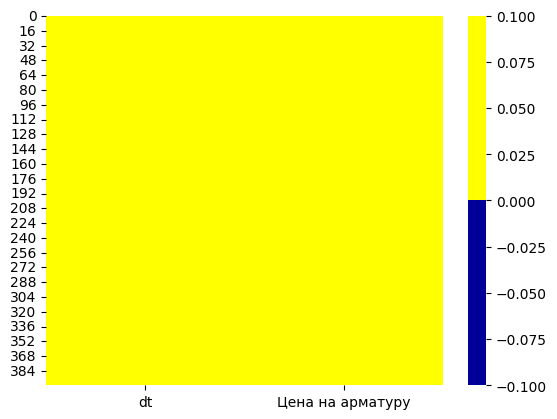

In [17]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [18]:
import pandas as pd

def detailed_duplicate_report(file_path, output_file='duplicates_report.csv'):
    try:
        df = pd.read_csv(file_path)
        rows_before = len(df)

        # Количество дубликатов до удаления
        duplicates_before = df.duplicated().sum()  # Подсчет дубликатов (вся строка)

        print(f"Количество строк в исходном файле: {rows_before}")
        print(f"Количество дубликатов до удаления: {duplicates_before}")

        # Удаление дубликатов
        df.drop_duplicates(inplace=True)  # Удаляем дубликаты (по умолчанию - по всем столбцам)
        rows_after = len(df)
        # Количество дубликатов после удаления
        duplicates_after = df.duplicated().sum()

        print(f"\nКоличество строк после удаления дубликатов: {rows_after}")
        print(f"Количество дубликатов после удаления: {duplicates_after}")

        # Сохранение обработанного файла
        df.to_csv(output_file, index=False)
        print(f"\nОбработанный файл сохранен в: {output_file}")

    except FileNotFoundError:
        print(f"Ошибка: Файл не найден по пути: {file_path}")
    except pd.errors.EmptyDataError:
        print(f"Ошибка: CSV-файл пуст: {file_path}")
    except pd.errors.ParserError:
        print(f"Ошибка: Не удалось разобрать CSV-файл: {file_path}")
    except Exception as e:
        print(f"Произошла ошибка: {e}")


# Пример использования:
file_path = r'C:\\Users\\Karina\\Desktop\\Интенсив_3\\МакропоказателиЧистка_1.csv' 
output_file = 'C:\\Users\\Karina\\Desktop\\Интенсив_3\\МакропоказателиЧистый.csv'  
detailed_duplicate_report(file_path, output_file)

Количество строк в исходном файле: 12
Количество дубликатов до удаления: 0

Количество строк после удаления дубликатов: 12
Количество дубликатов после удаления: 0

Обработанный файл сохранен в: C:\Users\Karina\Desktop\Интенсив_3\МакропоказателиЧистый.csv
